# TP 1 de Statistique descriptive avec SAS

Objectifs de la séance :
* Rappeler le fonctionnement général des procédures et de l'étape DATA;
* Réaliser une analyse univariée sur des variables qualitatives à l'aide de SAS (procédures UNIVARIATE et MEANS);
* Réaliser des graphiques (boîte à moustache, histogramme, courbe de Lorentz, droite d'Henry) en SAS à l'aide de la procédure SGPLOT.

Le matériel nécessaire à la réalisation de ce TP est disponible sous Moodle. Créer sous votre espace personnel un dossier "TP1" contenant l'aborescence suivante  :

Les exercices portent sur deux tables : RP12_D35 (données issues de l'enquête du recensemement de la population) et revenu. Voici le dictionnaire des variables de ces tables.

**Attention : l'exploitation de données issues d'enquêtes nécessite l'utilisation de pondérations. En effet, lors d'une enquête, seul un échantillon de la population est interrogé. Ainsi pour obtenir des informations sur la population totale, on utilisera des indicateurs pondérés (moyenne pondéré par exemple)**

## Exercice 1 - Analyse de la table RP12_D35

**Question 1** : créez une bibliothèque (ou library) *source* faisant le lien avec le dossier TP1/Source. Vous prendrez soin d'utiliser une option d'instruction permettant la lecture seule. Est-ce ici nécessaire de renseigner un moteur sachant que la table a été créée à l'aide de SAS 9.4?

Créez également une bibliothèque *resultat* qui va contenir les tables en résultat de ce TP.

Rappel : une bibliothèque est un lien logique entre un dossier de votre ordinateur et un nom SAS. 

In [ ]:
LIBNAME source "/folders/myfolders/Donnees_TP_SAS/TP1" ACCESS = READONLY;
LIBNAME resultat "/folders/myfolders/Donnees_TP_SAS/TP1";

**Question 2** : créez une copie de la table RP12_d35 dans la bibliothèque *resultat*.

In [ ]:
DATA resultat.RP12_d35;
SET source.RP12_d35;
RUN;

**Question 3** : en utilisant une procédure, affichez les vingts premières lignes de la table.

In [ ]:
PROC PRINT DATA = source.RP12_d35(OBS = 20);
RUN;

**Question 4** : À l'aide d'une procédure judicieusement choisie, affichez des informations générales sur la table RP12 ainsi que sur les variables. Combien de variables et d'observations contient cette table ? Combien de variables numériques sont disponibles dans cette table ?

In [ ]:
PROC CONTENTS DATA = source.RP12_d35;
RUN;

**Question 5** : Quel est l'âge médian en Ille-et-Vilaine ? Celui des femmes et celui des hommes ? Veillez à ne pas afficher le nombre d'observations par sexe dans vos sorties.

**N'hésitez pas à préciser aux étudiants que l'instruction CLASS ne nécessite pas de trier la table au préalable**

In [ ]:
PROC MEANS DATA = source.RP12_d35 MEDIAN;
VAR AGE;
WEIGHT IPONDI;
RUN;

In [ ]:
PROC MEANS DATA = source.RP12_d35 MEDIAN NOOBS;
VAR AGE;
WEIGHT IPONDI;
CLASS SEXE;
RUN;

Il est également possible de répondre à cette question en utilisant la procédure UNIVARIATE. Les sorties de cette procédure sont plus riches que celles de la procédure MEANS. 

In [ ]:
PROC UNIVARIATE DATA = source.RP12_d35; 
VAR AGE;
WEIGHT IPONDI;
CLASS SEXE;
RUN;

**Question 6** : Calculez les déciles d'âge par sexe ainsi que le rapport interdécile. Stockez-les dans une table SAS

**Question 7** : Calculez à l'aide d'une procédure des indicateurs statistiques (moyenne, médiane, minimum, maximum, mode) sur l'âge en Ille-et-Vilaine et stockez-les dans une seule table.

**Insistez sur l'utilisation de l'option de procédure VARDEF car sinon la pondération est mal prise en compte dans le calcul de l'écart-type**

In [ ]:
PROC UNIVARIATE DATA = source.RP12_d35 VARDEF = WEIGHT;
VAR AGE;
WEIGHT IPONDI;
OUTPUT OUT = age_descriptive;
RUN;

**Question 8** : Faites deux représentations graphiques de la distribution de l'âge (histogramme et boîte à moustache) et repérez à vue de nez sur le graphique les indicateurs de tendance centrale. On pourra utiliser la procédure SGPLOT.

Remarque : il est possible d'obtenir un histogramme avec la procédure UNIVARIATE à l'aide de l'instruction HISTOGRAM mais les poids ne seront pas pris en compte.

In [ ]:
PROC SGPLOT data=SOURCE.RP12_D35;
    VBOX age / WEIGHT = IPONDI;
    TITLE "Boîte à moustache de la variable AGE";
RUN;

In [ ]:
PROC SGPLOT DATA = source.RP12_d35;
HISTOGRAM AGE / WEIGHT = IPONDI binstart = 0 binwidth = 1;
TITLE "Histogramme de la variable AGE";
RUN;

**Attention : avec la procédure UNIVARIATE, il est impossible d'utiliser des poids pour faire un histogramme.**

In [ ]:
PROC UNIVARIATE DATA = source.RP12_d35;
VAR AGE;
HISTOGRAM/ endpoids = 1 2;
RUN;

**Question 9** : En utilisant une seule procédure SGPLOT, comparez à l'aide d'une boîte à moustache l'âge des femmes et l'âge des hommes.

In [ ]:
PROC SGPLOT DATA = SOURCE.RP12_D35;
     VBOX age / CATEGORY=SEXE WEIGHT=IPONDI;
     YAXIS grid;
RUN;


**Question 10** : On aimerait vérifier de manière graphique si l'âge est distribuée selon une loi gaussienne. Proposez un graphique permettant cette comparaison et réalisez-le.

In [ ]:
PROC UNIVARIATE DATA = source.RP12_d35 NOPRINT;
QQPLOT AGE;
RUN;

**Question 11** : Calculez pour chaque observation l'écart de l'âge pondéré à la moyenne arithmétique pondéré de la variable AGE (poids*age - moyenne pondérée). Vous stockerez ces valeurs dans une variable nommée ECM dans la table resultat.RP12_d35. Combien vaut le total de cette variable ? Vérifiez en calculant les effectifs cumulés en utilisant une étape DATA et l'instruction RETAIN.

En effet, soit $X = (x_1, ..., x_n)$. On note $\omega = (\omega_1, ..., \omega_n)$ les poids associés. La moyenne arithmétique pondérée est donnée par $\displaystyle \bar{x} = \sum_{i=1}^n \omega_i x_i$. Pour un individu i, $ECM_i$ = $\omega_i x_i - \bar{x}$ d'où $\displaystyle \sum_{i = 1}^{n} ECM_i = \sum_{i=1}^n \omega_i x_i - \sum_{i = 1}^n \bar{x} = \sum_{i=1}^n \omega_i x_i - n\bar{x} = 0$

In [ ]:
DATA resultat.RP12_d35;
SET resultat.RP12_d35;
retain cumul 0;
cumul = sum(cumul, ECM);
run;

**Question 12** : À l'aide d'une étape DATA, ajoutez la variable AGETRANCHE qui va valoir : 
* "[0;18[" quand l'âge est entre 0 et 18 ans exclus
* "[18;26[" quand l'âge est entre 18 et 26 ans
* "[26;55[" quand l'âge est entre 26 et 55 ans
* "[55;65[" quand l'âge est entre 55 et 65 ans
* "[65;80[" quand l'âge est entre 65 et 80 ans
* "[80 et plus[" sinon

In [ ]:
DATA resultat.RP12_d35;
SET resultat.RP12_d35;
SELECT;
    WHEN (AGE >= 0 AND AGE < 18) AGETRANCHE = "[0;18]";
    WHEN (AGE <= 18 AND AGE < 26) AGETRANCHE = "[18;26[";
    WHEN (AGE <= 26 AND AGE < 40) AGETRANCHE = "[26;40[";
    WHEN (AGE <= 40 AND AGE < 55) AGETRANCHE = "[40;55[";
    WHEN (AGE <= 55 AND AGE < 65) AGETRANCHE = "[55;65[";
    WHEN (AGE <= 65 AND AGE < 80) AGETRANCHE = "[65;80[";
    OTHERWISE AGETRANCHE = "[80;+[";
END;
RUN;

## Exercice 2 - Calcul d'un coefficient de Gini et d'une courbe de Lorentz

**Question 13** : Créer la variable TRANCHE_REV qui comportera les modalités suivantes :
* "[0;4]" si revenu est compris entre 0 et 4;
* "]4;7]" si revenu est compris entre 4 et 7;
* "]7;12]" si revenu est compris entre 7 et 12;
* "]12;20]" si revenu est compris entre 12 et 20;
* "]20;+]" sinon



In [ ]:
DATA resultat.revenu;
SET source.revenu;
SELECT;
    WHEN (REVENU >= 0 AND REVENU < 4) TRANCHE_REV = "[00;04]";
    WHEN (REVENU >= 4 AND REVENU < 7) TRANCHE_REV = "[04;07[";
    WHEN (REVENU >= 7 AND REVENU < 12) TRANCHE_REV = "[07;12[";
    WHEN (REVENU >= 12 AND REVENU < 20) TRANCHE_REV = "[12;20[";
    OTHERWISE TRANCHE_REV = "[20;+[";
END;
RUN;

**Question 14** : Créer la table EFF_TRANCHE à l'aide d'une procédure FREQ. Cette table contiendra le nombre d'individus par tranche de revenu (TRANCHE_REV). On ne gardera que les variables TRANCHE_REV et PERCENT. 

In [ ]:
PROC FREQ DATA = resultat.revenu;
TABLE tranche_rev / OUT = eff_tranche;
RUN;

In [ ]:
DATA eff_tranche;
SET eff_tranche;
KEEP TRANCHE_REV PERCENT;
RUN;

**Question 15** : Renommez dans la table EFF_TRANCHE la variable PERCENT en PCT_EFFECTIF.

In [ ]:
DATA eff_tranche;
SET eff_tranche;
RENAME PERCENT = PCT_EFFECTIF;
RUN;

**Question 16** : Créez la table REVENU_TOT_TRANCHE à l'aide d'une procédure TABULATE. Cette table contiendra la somme des revenus par tranche. On ne gardera que les variables revenu_PctSum_0_revenu et TRANCHE_REV.

In [ ]:
PROC TABULATE DATA = resultat.revenu out = REVENU_TOT_TRANCHE;
TABLES tranche_rev,revenu*pctsum;
VAR revenu;
CLASS tranche_rev;
RUN;

In [ ]:
DATA REVENU_TOT_TRANCHE;
SET REVENU_TOT_TRANCHE;
KEEP TRANCHE_REV revenu_PctSum_0_revenu;
RUN;

**Question 17** : Renommez dans la table REVENU_TOT_TRANCHE la variable revenu_PctSum_0_revenu en PCT_REV.

In [ ]:
DATA revenu_tot_tranche;
SET revenu_tot_tranche;
RENAME revenu_PctSum_0_revenu =PCT_REVENU;
RUN;

**Question 18** : Fusionnez ces deux tables. La table fusionnée se nommera DONNEES_GINI.

In [ ]:
DATA donnees_gini;
MERGE eff_tranche revenu_tot_tranche;
BY tranche_rev;
RUN;

**Question 19** : Créez les variables PCT_EFFECTIF_CUM et PCT_REVENU_CUM qui seront respectivement les sommes cumulées des variables PCT_EFFECTIF et PCT_REVENU

**Merci de bien montrer aux élèves que sous la forme suivante le RETAIN est implicite.**

In [ ]:
DATA donnees_gini;
SET donnees_gini;
pct_effectif_cum + pct_effectif; 
pct_revenu_cum + pct_revenu;
RUN;

**Question 20** :  Pour chaque point, calculez l'aire du trapèze élémentaire. Pour rappel, l'aide du i-ème trapèze élementaire vaut $\displaystyle \frac{(\text{PCT_EFFECTIF_CUM}_{i+1} - \text{PCT_EFFECTIF_CUM}_{i})\times(\text{PCT_REVENU_CUM}_{i+1} + \text{PCT_REVENU_CUM}_{i})}{2}$. 

Pour cela, on construira les variables PCT_EFFECTIF_CUM_SUIVANT et PCT_AGE_CUM_SUIVANT qui contiendront les valeurs décalées d'un rang positivement. SAS dispose d'une fonction LAG qui permet de créer à partir d'une varible dont les valeurs sont $(x_1, ..., x_n)$, la variable décalée **négativement** $(., x_1, ...,x_{n-1})$ mais ne dispose pas d'une fonction LEAD (décalage d'un cran positivement donc permettant d'obtenir $(x_2, ..., x_n, .)$. On pourra utiliser habilement une procédure SORT avec l'option d'instruction DESCREASING ainsi que la fonction LAG pour obtenir un décalage positif. 

In [ ]:
PROC SORT DATA = donnees_gini;
by descending pct_effectif_cum;
run;

In [ ]:
DATA donnees_gini;
SET donnees_gini;
pct_effectif_cum_suivant = LAG(pct_effectif_cum);
pct_revenu_cum_suivant = LAG(pct_revenu_cum);
RUN;

In [ ]:
PROC SORT DATA = donnees_gini;
BY pct_effectif_cum;
RUN;

In [ ]:
DATA donnees_gini;
SET donnees_gini;
trapeze_elem = (pct_effectif_cum_suivant - pct_effectif_cum)*(pct_age_cum_suivant + pct_age_cum)/20000;
RUN;


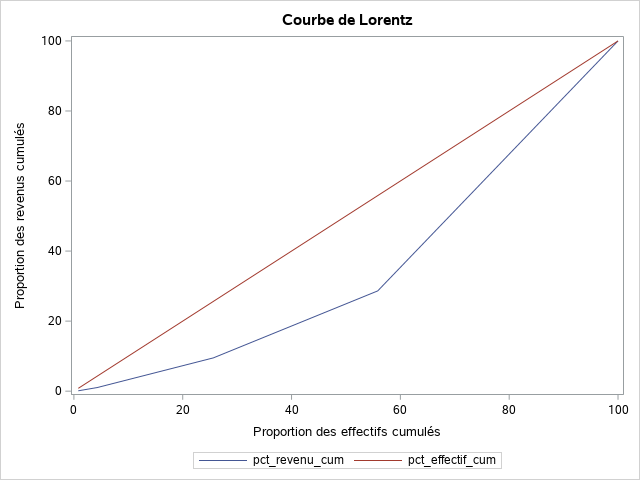

In [41]:
PROC SGPLOT DATA = donnees_gini;
SERIES x = pct_effectif_cum Y = pct_revenu_cum;
SERIES x = pct_effectif_cum Y = pct_effectif_cum;
TITLE 'Courbe de Lorentz';
XAXIS LABEL = "Proportion des effectifs cumulés";
YAXIS LABEL = "Proportion des revenus cumulés";
run;